Based on the course _Elements of Data Science_ from the [AWS Certified Machine Learning](https://aws.amazon.com/training/learning-paths/machine-learning/) program and [The Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial), this notebook summarizes the ML workflow and provides a template as a starting guide to a new project.

Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Dataset loading

In [2]:
train_df = pd.read_csv('./data/titanic/train.csv')
test_df = pd.read_csv('./data/titanic/test.csv')

df = train_df.append(test_df, ignore_index = True)

Visualization helpers

In [3]:
# Some plot helpers from kaggle.com/helgejo/an-interactive-data-science-tutorial
def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()
    
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def plot_distribution(df, var, target, **kwargs):
    """
    Fit and plot a univariate or bivariate kernel density estimate.
    """
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()

def plot_histogram(df, var, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, aspect=4, row=row, col=col)
    facet.map(sns.distplot, var, hist=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title('Skew: ' + str(round(float(df[var_name].skew()), )) + ' - ' + var_name)
        ax.set_xticklabels([], visible=True)
        ax.set_yticklabels([], visible=True)
    fig.tight_layout()
    plt.show()

# Exploratory Data Analysis

To understand relationships in data.

As toy example we will use the famous Titanic dataset from Kaggle.

For a description on the meaning of the columns go to https://www.kaggle.com/c/titanic/data

## First look

In [4]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Any nulls?

In [5]:
df.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

## Data statistics

Dimensions

In [6]:
# Number of instances x attributes
df.shape

(1309, 12)

Histograms and plots will let us understand the behavior of the feature.

### Univariate statistics

#### Numeric attributes

In [7]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


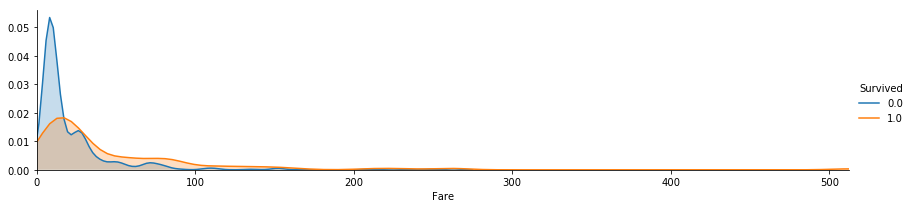

In [9]:
plot_distribution(df, var='Fare', target='Survived')

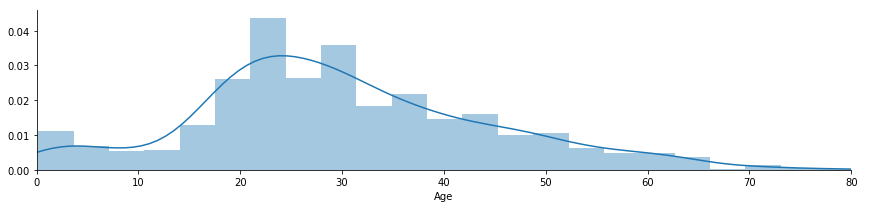

In [10]:
plot_histogram(df, var='Age')

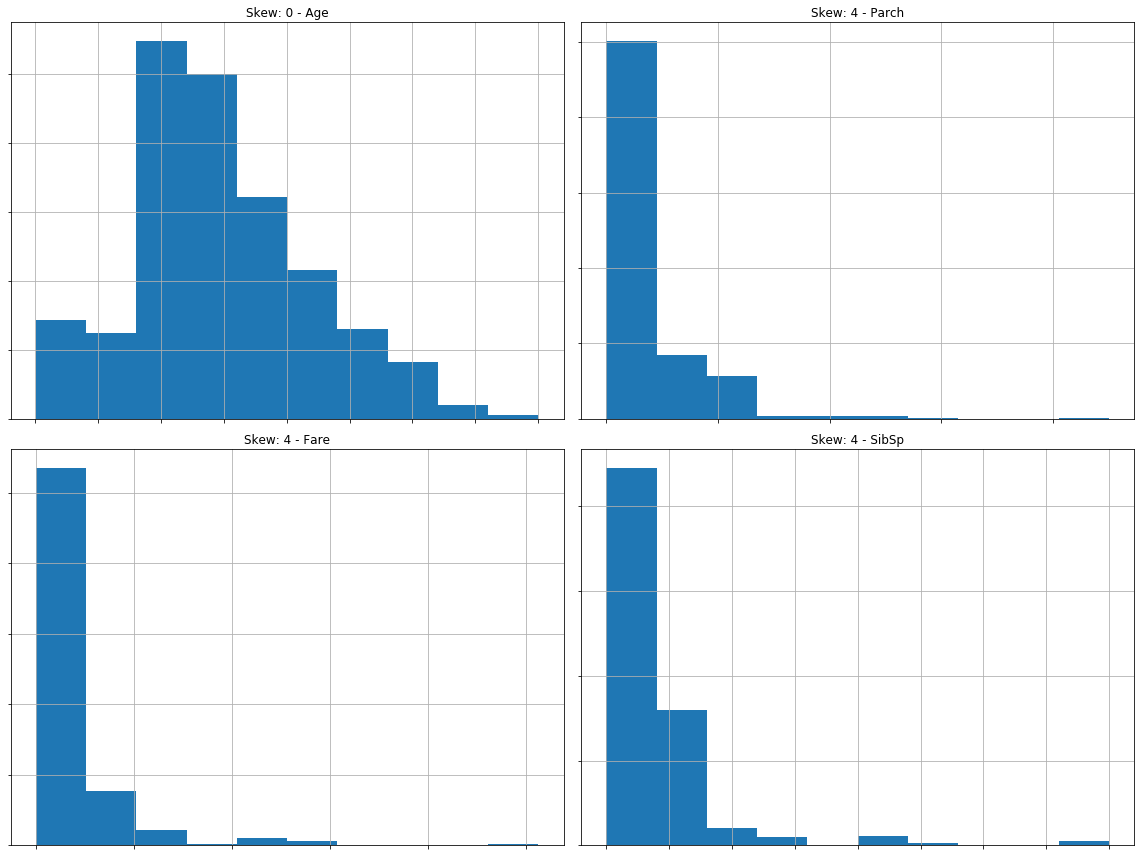

In [11]:
plot_histograms(df, variables=['Age', 'Parch', 'Fare', 'SibSp'], n_rows=2, n_cols=2)

#### Categorical attributes

In [21]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [20]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


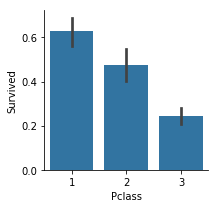

In [22]:
plot_categories(df, cat='Pclass', target='Survived')

/home/ro/anaconda2/envs/deep/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


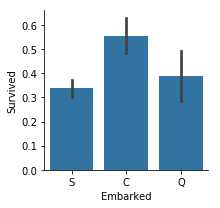

In [13]:
plot_categories(df, cat='Embarked', target='Survived')

### Multivariate statistics

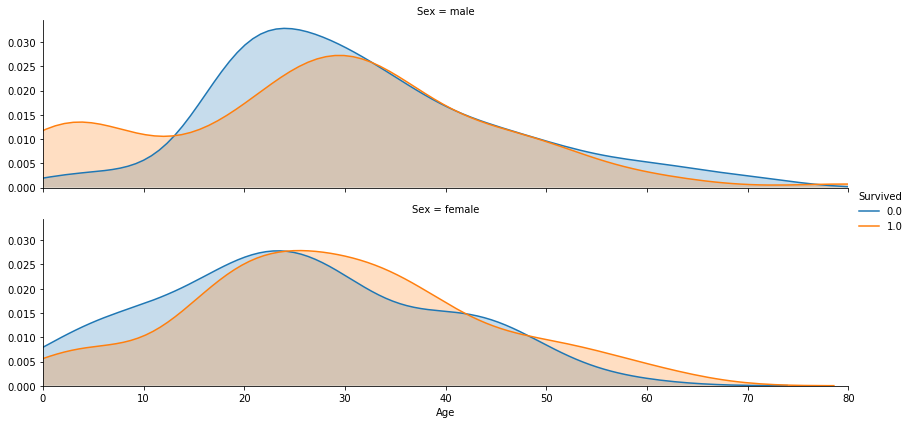

In [14]:
plot_distribution(df, var='Age', target='Survived', row='Sex')

Fare for group S (median) 13.0
Fare for group C (median) 28.51875
Fare for group Q (median) 7.75


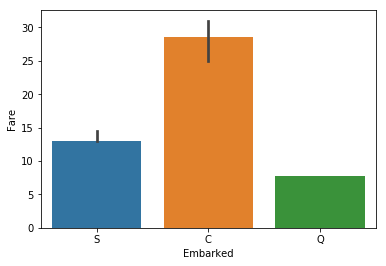

In [15]:
sns.barplot(x="Embarked", y="Fare", data=df, estimator=np.median)
print('Fare for group S (median)', df[df['Embarked'] == 'S']['Fare'].median())
print('Fare for group C (median)', df[df['Embarked'] == 'C']['Fare'].median())
print('Fare for group Q (median)', df[df['Embarked'] == 'Q']['Fare'].median())

#### Scatterplot matrix

Is an efficient way of spotting strong correlations between variables

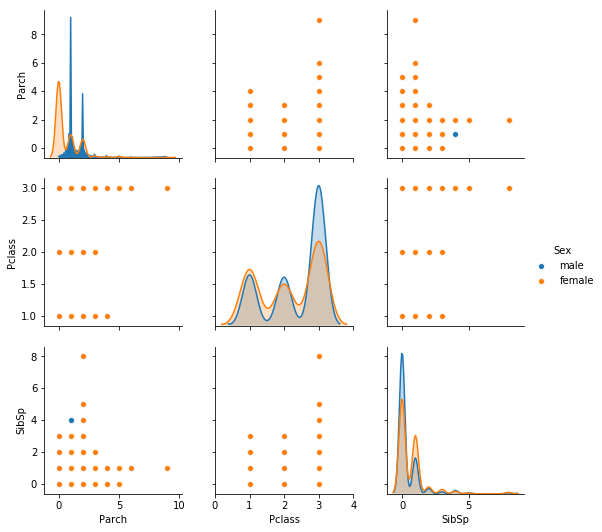

In [16]:
# Will not work if a column has null values
sns.pairplot(df[['Parch', 'Pclass', 'Sex', 'SibSp']], hue="Sex")

These variables look independent

## Correlations


Pearson Correlation

\begin{equation}
{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}
\end{equation}

Variance

\begin{equation}
{\displaystyle \sigma _{X}^{2}={\frac {1}{n}}\sum _{i=1}^{n}\left(X_{i}-{\overline {X}}\right)^{2}}
\end{equation}

Covariance between (x, y)

\begin{equation}
{\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-E(X))(y_{i}-E(Y)).}
\end{equation}

Correlation between (x, y)

\begin{equation}
{\displaystyle \rho _{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}}
\end{equation}

A _correlation matrix_ measures the linear dependence between features.


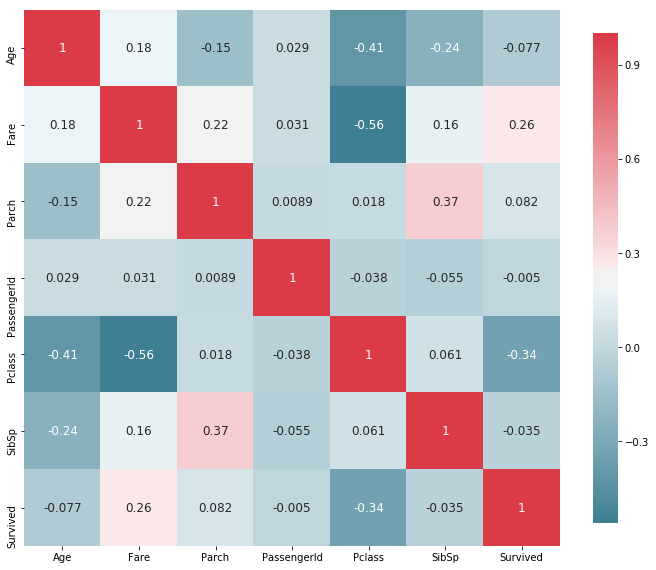

In [17]:
plot_correlation_map(df)

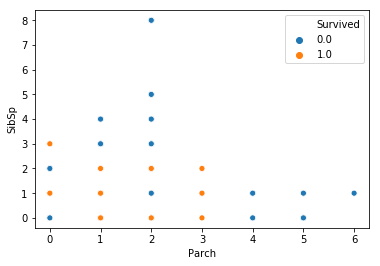

In [26]:
sns.scatterplot(x="Parch", y="SibSp", hue="Survived", data=df)

## Data issues

* Messy data
* Different scales
* Mixed types
* Imbalanced data
* Sample bias
* Outliers
* Highly correlated features

Imbalanced data?

In [18]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64